In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
x,y=make_regression(
    n_samples=100,
    n_features=1,
    n_targets=1,
    noise=20,
    random_state=42
)

In [7]:
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)
r2_score(y,y_pred)

0.853154207317982

In [5]:
lr.coef_,lr.intercept_

(array([47.13323967]), 2.3302306410539453)

In [6]:
from sklearn.linear_model import Ridge

In [14]:
rr=Ridge(alpha=10)
rr.fit(x,y)
y_pred1=rr.predict(x)
r2_score(y,y_pred1)

0.8429977659891696

In [15]:
rr.coef_,rr.intercept_

(array([41.9906212]), 1.7961876226164746)

In [16]:
rr1=Ridge(alpha=100)
rr1.fit(x,y)
y_pred1=rr.predict(x)
r2_score(y,y_pred1)

0.8429977659891696

In [18]:
rr1.coef_,rr1.intercept_

(array([21.18627364]), -0.3642714175995887)

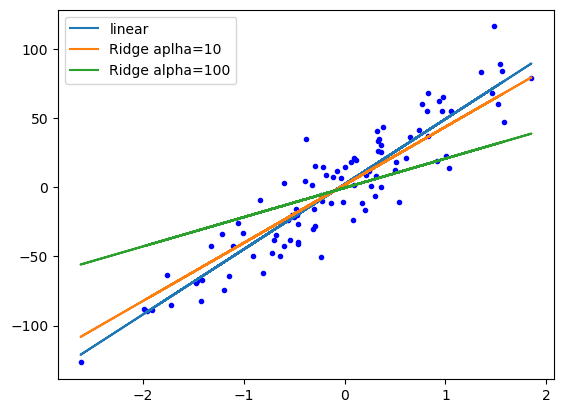

In [23]:
plt.plot(x,y,"b.")
plt.plot(x,lr.predict(x),label='linear')
plt.plot(x,rr.predict(x),label='Ridge aplha=10')
plt.plot(x,rr1.predict(x),label='Ridge alpha=100')
plt.legend()
plt.show()

# My Own Simple Ridge Regression CLass

In [27]:
class MeraRidgeRegression:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
    def fit(self,x,y):
        numerator=0
        denometor=0
        for i in range(x.shape[0]):
            numerator+=(y[i]-y.mean())*(x[i]-x.mean())
            denometor+=(x[i]-x.mean())*(x[i]-x.mean())
        denometor+=self.alpha
        self.coef_=numerator/denometor
        self.intercept_=y.mean()-(self.coef_*x.mean())
    def predict(self,x):
        return self.intercept_ + self.coef_*x
        
        
        

In [28]:
Mrr=MeraRidgeRegression(10)

In [29]:
Mrr.fit(x,y)

In [30]:
y_pred2=Mrr.predict(x)

In [31]:
r2_score(y,y_pred2)

0.8429977659891698

In [32]:
Mrr.coef_,Mrr.intercept_

(array([41.9906212]), array([1.79618762]))

In [33]:
Mrr1=MeraRidgeRegression(100)

In [34]:
Mrr1.fit(x,y)
y_pred3=Mrr1.predict(x)
r2_score(y,y_pred3)

0.5946032680938578

In [35]:
Mrr1.coef_,Mrr1.intercept_

(array([21.18627364]), array([-0.36427142]))